In [1]:
from os.path import expanduser, join
import numpy as np
import matplotlib.pyplot as plt

from black_box_tools.db_utils import DBUtils
from black_box_tools.data_utils import DataUtils
from black_box_tools.plot_utils import PlotUtils

# Parameters

The following parameters should be set appropriately so that the correct data are read.

In [2]:
log_db_data_name = 'data'

# Database restoring

Uncomment the lines below for restoring the MongoDB database.

In [ ]:
# log_db_data_path = join(expanduser('~'), log_db_data_name)
# DBUtils.restore_db(log_db_data_path)

# Data parsing

We first read the data of interest - in this case the velocity commands.

In [3]:
cmd_vel_docs = DBUtils.get_all_docs(log_db_data_name, 'ros_ropod_cmd_vel')

timestamps = DataUtils.get_all_measurements(cmd_vel_docs, 'timestamp')
x_velocities = DataUtils.get_all_measurements(cmd_vel_docs, 'linear/x')
y_velocities = DataUtils.get_all_measurements(cmd_vel_docs, 'linear/y')
theta_velocities = DataUtils.get_all_measurements(cmd_vel_docs, 'angular/z')

# Data plotting

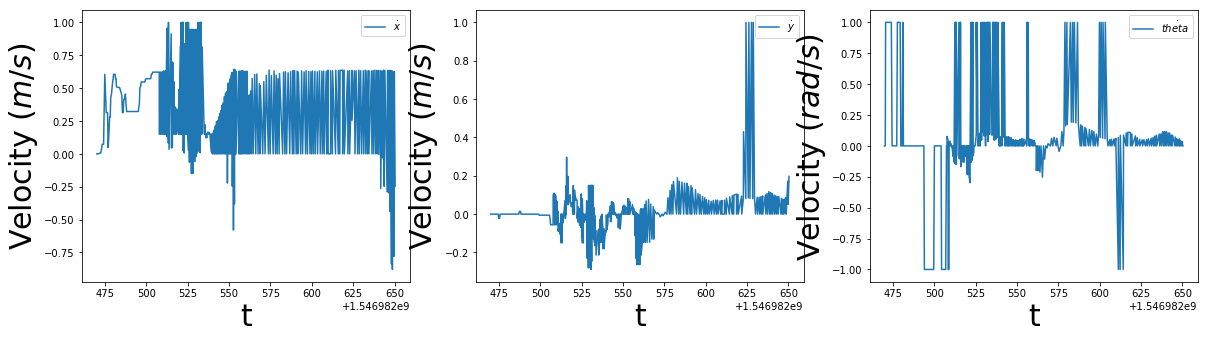

In [5]:
fig = plt.figure(figsize=(20,5))

PlotUtils.subplot_data(fig=fig, subplot_params=(1,3,1),
                       timestamps=timestamps,
                       data=x_velocities,
                       x_label='t',
                       y_label='Velocity ($m/s$)',
                       data_label='$\dot{x}$')

PlotUtils.subplot_data(fig=fig, subplot_params=(1,3,2),
                       timestamps=timestamps,
                       data=y_velocities,
                       x_label='t',
                       y_label='Velocity ($m/s$)',
                       data_label='$\dot{y}$')

PlotUtils.subplot_data(fig=fig, subplot_params=(1,3,3),
                       timestamps=timestamps,
                       data=theta_velocities,
                       x_label='t',
                       y_label='Velocity ($rad/s$)',
                       data_label='$\dot{theta}$')

plt.show()